### **Exemplo RPCA com Eigenbeef**

---

Gabriel Oukawa <br>
Álgebra linear para ciência de dados <br>
2º Semestre de 2025

---


# 1. Exemplo RPCA com Eigenfaces - Exemplo da Seção 3.7 (Livro Data-driven Science and Engineering)



In [26]:
import numpy as np
import gdown
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [27]:
gdown.download(id='1S16zzLC_Y-zEaxw1O__kcQB7hCjdD-u_', output='allFaces.mat', quiet=True)

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = loadmat('allFaces.mat', matlab_compatible=True)
faces = mat_contents['faces']
nfaces = mat_contents['nfaces'].reshape(-1)

In [28]:
def shrink(X,tau):
    Y = np.abs(X)-tau

    return np.sign(X) * np.maximum(Y,np.zeros_like(Y))

def SVT(X,tau):
    U,S,VT = np.linalg.svd(X,full_matrices=0)
    out = U @ np.diag(shrink(S,tau)) @ VT

    return out

def RPCA(X):
    n1,n2 = X.shape
    mu = n1*n2/(4*np.sum(np.abs(X.reshape(-1))))
    lambd = 1/np.sqrt(np.maximum(n1,n2))
    thresh = 10**(-7) * np.linalg.norm(X)

    S = np.zeros_like(X)
    Y = np.zeros_like(X)
    L = np.zeros_like(X)
    count = 0

    while (np.linalg.norm(X-L-S) > thresh) and (count < 1000):
        L = SVT(X-S+(1/mu)*Y,1/mu)
        S = shrink(X-L+(1/mu)*Y,lambd/mu)
        Y = Y + mu*(X-L-S)
        count += 1

    return L,S

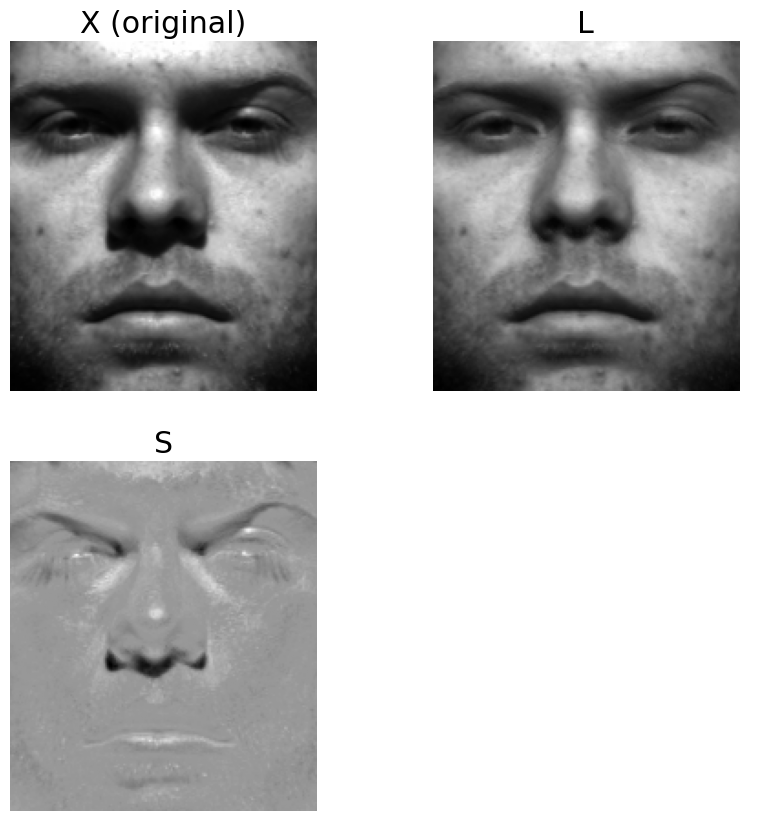

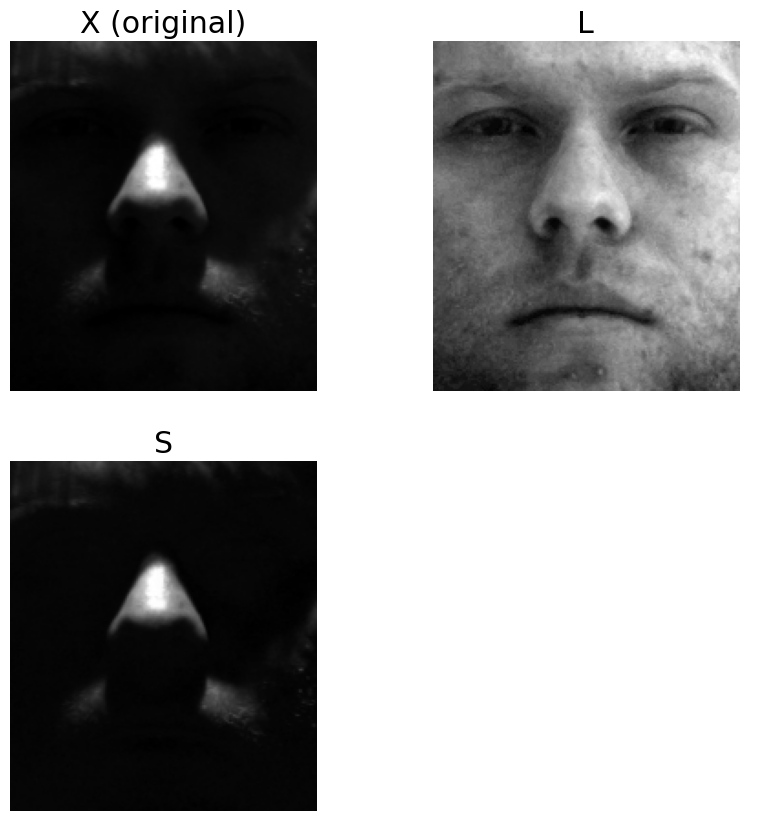

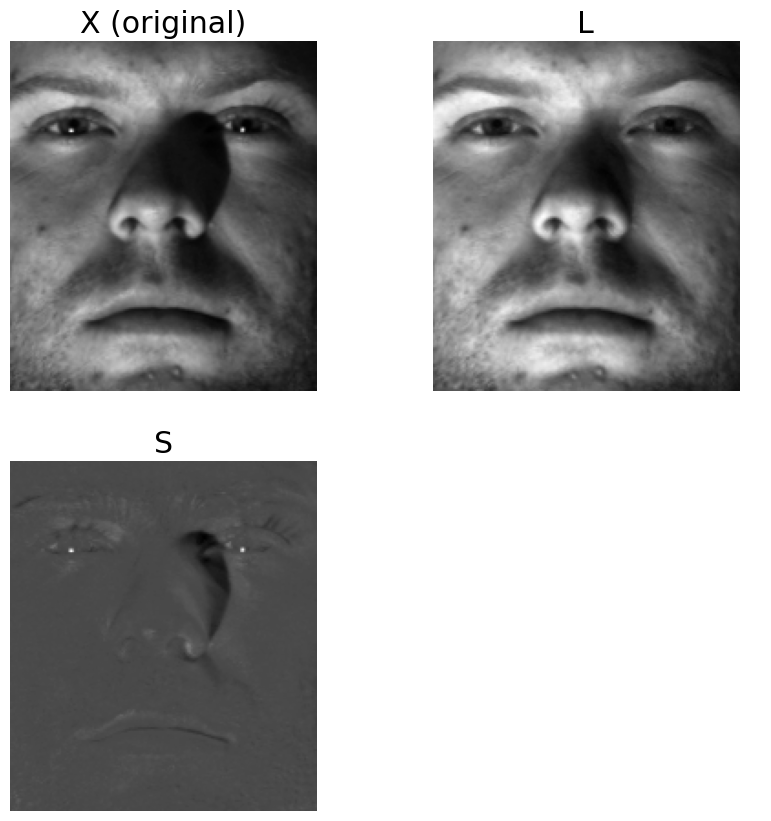

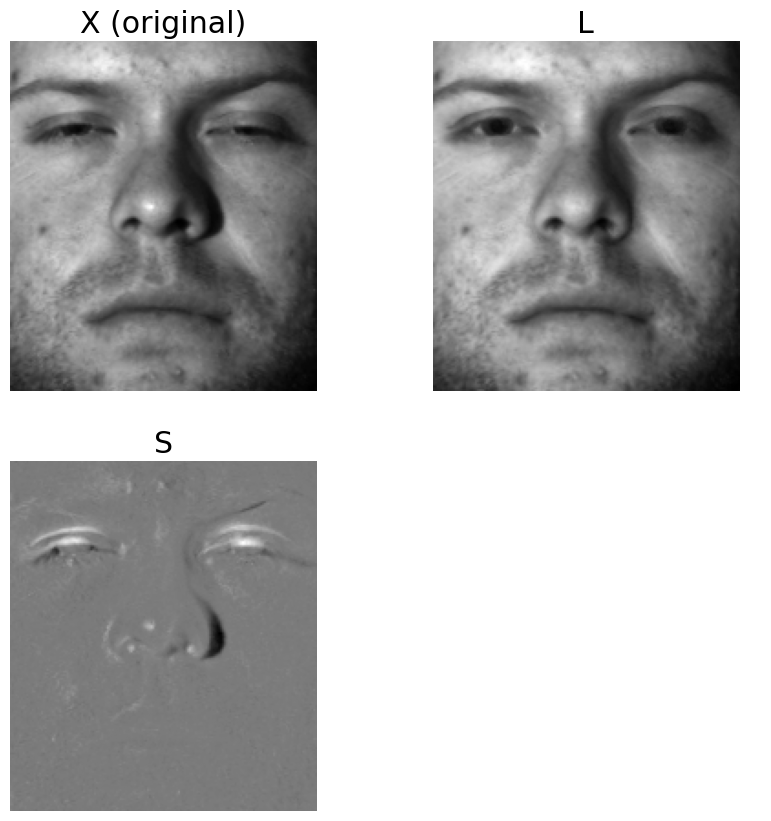

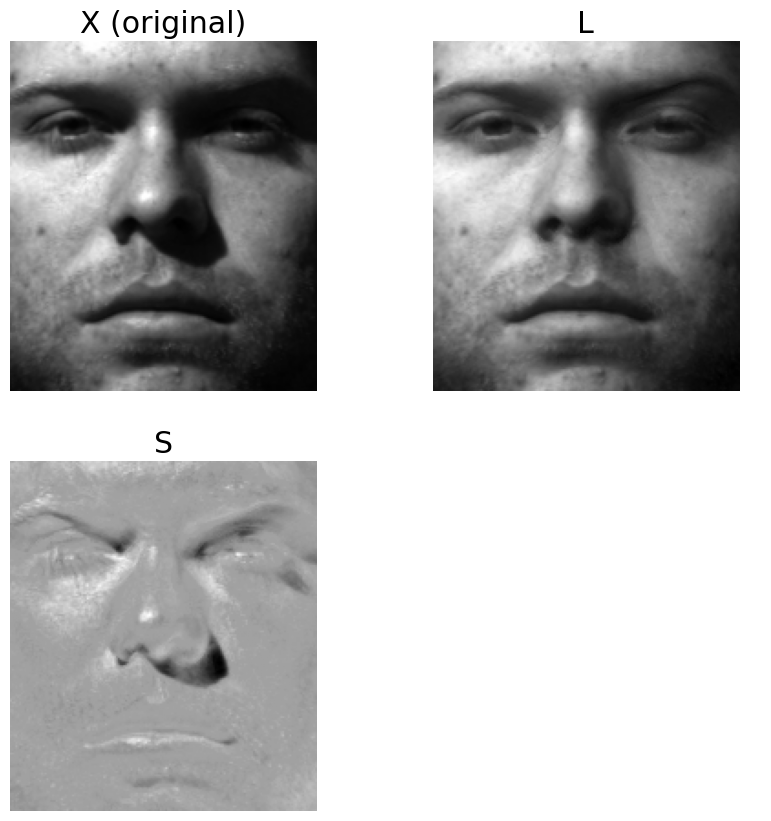

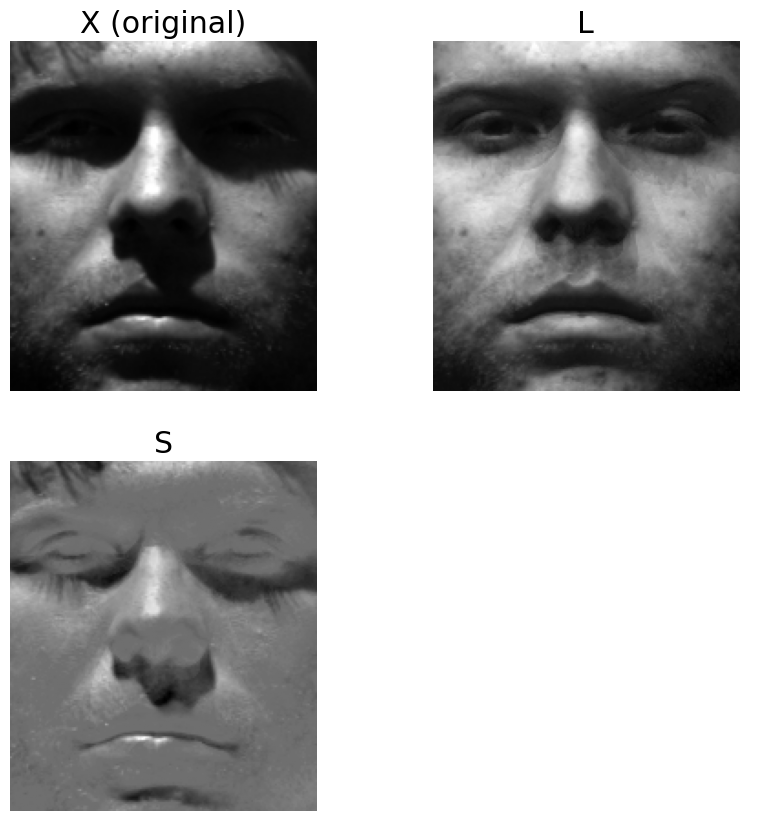

In [29]:
X = faces[:, :int(nfaces[0])]

L,S = RPCA(X)

inds = (3,4,14,15,17,18)

for k in inds:
    fig,axs = plt.subplots(2,2)
    axs = axs.reshape(-1)
    axs[0].imshow(np.reshape(X[:,k-1],(168,192)).T,cmap='gray')
    axs[0].set_title('X (original)')
    axs[1].imshow(np.reshape(L[:,k-1],(168,192)).T,cmap='gray')
    axs[1].set_title('L')
    axs[2].imshow(np.reshape(S[:,k-1],(168,192)).T,cmap='gray')
    axs[2].set_title('S')
    for ax in axs:
        ax.axis('off')

# 2. Exemplo RPCA com Eigenbeef


In [30]:
import numpy as np
import os
import gdown
import tarfile
import random
from PIL import Image
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [31]:
# Baixar dados de entrada
os.makedirs('/content/beef', exist_ok=True)

gdown.download(id='12--4AYRmKohssGxlGM7MPGTb5dOqPCWD', quiet=True)

'beef.tar'

In [32]:
def shrink(X, tau):
    Y = np.abs(X) - tau

    return np.sign(X) * np.maximum(Y, np.zeros_like(Y))

def SVT(X, tau):
    U, S, VT = np.linalg.svd(X, full_matrices=False)

    return U @ np.diag(shrink(S, tau)) @ VT

def RPCA(X):
    n1, n2 = X.shape
    mu = n1 * n2 / (4 * np.sum(np.abs(X.reshape(-1))))
    lambd = 1 / np.sqrt(max(n1, n2))
    thresh = 1e-7 * np.linalg.norm(X)

    S = np.zeros_like(X)
    Y = np.zeros_like(X)
    L = np.zeros_like(X)
    count = 0

    while np.linalg.norm(X - L - S) > thresh and count < 1000:
        L = SVT(X - S + (1 / mu) * Y, 1 / mu)
        S = shrink(X - L + (1 / mu) * Y, lambd / mu)
        Y = Y + mu * (X - L - S)
        count += 1

    return L, S

In [33]:
with tarfile.open('beef.tar', 'r:tar') as tar:
    image_members = [m for m in tar.getmembers() if m.name.lower().endswith(('.jpg', '.jpeg'))]
    images = []
    for member in image_members:
        f = tar.extractfile(member)
        img = Image.open(f).convert('L')
        images.append(np.array(img))

random.shuffle(images)

selected_images = images[:20]
H, W = selected_images[0].shape

X = np.array([img.flatten() for img in selected_images]).T

print(X.shape)

(173056, 20)


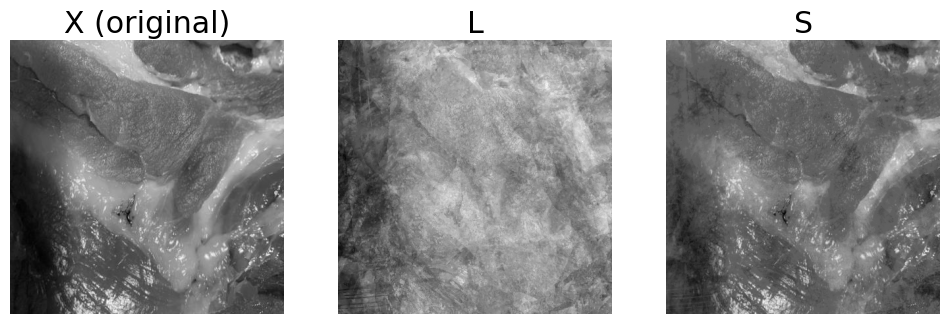

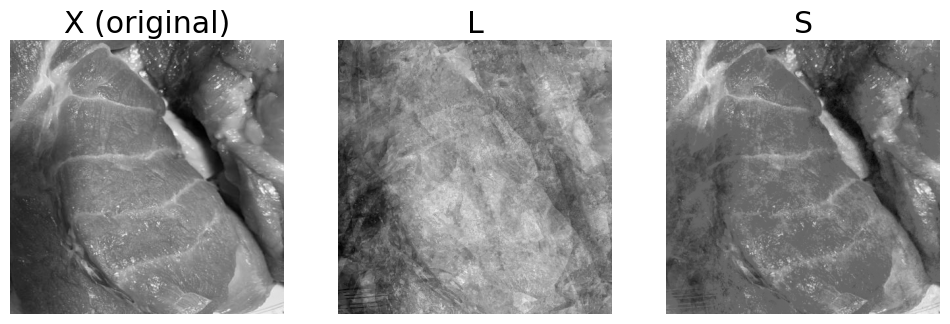

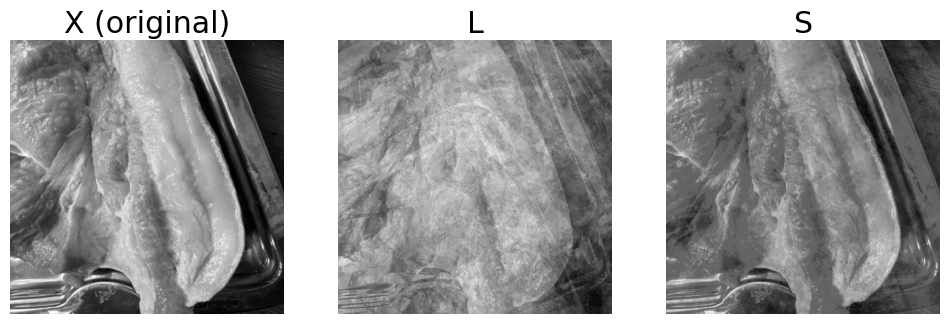

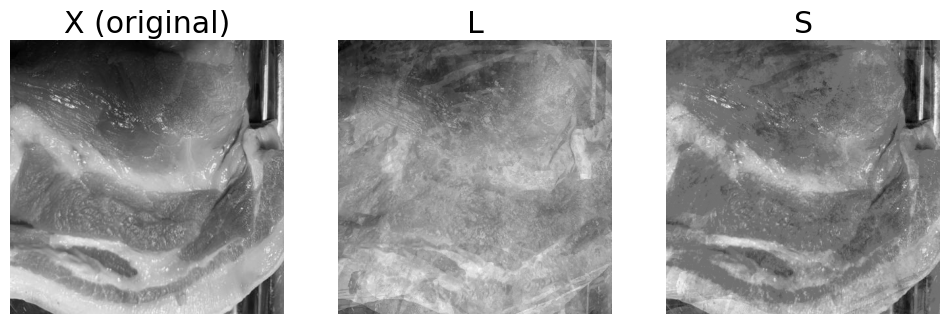

In [34]:
L, S = RPCA(X)

sample_indices = [0, 3, 5, 10]

for k in sample_indices:
    fig, axs = plt.subplots(1, 3, figsize=(12, 6))

    axs[0].imshow(X[:, k].reshape(H, W), cmap='gray')
    axs[0].set_title('X (original)')
    axs[0].axis('off')

    axs[1].imshow(L[:, k].reshape(H, W), cmap='gray')
    axs[1].set_title('L')
    axs[1].axis('off')

    axs[2].imshow(S[:, k].reshape(H, W), cmap='gray')
    axs[2].set_title('S')
    axs[2].axis('off')

    plt.show()